### Initial exploration of the data format etc using the Single Family Residence data from Zillow

In [100]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
#read in data

df = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv',encoding = "ISO-8859-1")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1041900,1044100,1047700,1049600,1048500,1048500,1052700,1057800,1067100,1076100
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1320100,1320200,1319100,1318200,1319600,1322700,1328100,1334600,1340900,1342900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800


In [64]:
df.shape

(15449, 284)

In [102]:
#Select Texas and save incase maybe I want to look at it later

Texas = df[df['State']=='TX']
print(Texas.shape)
Texas.head()

(937, 284)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,336800,338100,338500,337200,336200,336100,335300,334000,333400,333200
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,177400,178100,178700,179600,180300,180900,181900,183200,182900,181500
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,123700,124600,125700,126400,126800,127500,128100,128600,128800,128800
5,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,6,95000.0,95200.0,95400.0,...,167500,168800,169700,170900,172400,173800,175500,177400,177500,175900
10,92593,78660,Pflugerville,TX,Austin-Round Rock,Travis County,11,138900.0,138600.0,138400.0,...,245500,246500,246900,247500,248700,249800,250300,250800,251900,252600


In [103]:
Texas.to_csv('TX_zip.csv')

In [104]:
del Texas

In [105]:
#Select austin data

atx = df[df['Metro']=='Austin-Round Rock']

In [106]:
print(atx.shape)
atx.head()

(73, 284)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
10,92593,78660,Pflugerville,TX,Austin-Round Rock,Travis County,11,138900.0,138600.0,138400.0,...,245500,246500,246900,247500,248700,249800,250300,250800,251900,252600
27,92551,78613,Cedar Park,TX,Austin-Round Rock,Williamson County,28,169600.0,169000.0,168600.0,...,297000,297200,298000,299500,301700,304400,306800,308200,308400,307600
59,92617,78704,Austin,TX,Austin-Round Rock,Travis County,60,221300.0,221100.0,221000.0,...,572000,577900,581200,586800,595400,599700,599300,603100,613000,621300
74,92598,78666,San Marcos,TX,Austin-Round Rock,Hays County,75,103100.0,103000.0,103000.0,...,211300,211700,212100,212000,211500,211400,212200,213800,216800,219300
77,92654,78745,Austin,TX,Austin-Round Rock,Travis County,78,135000.0,134200.0,133800.0,...,300900,303100,306000,309100,312600,315700,318000,320800,321700,319700


In [107]:
atx.isnull().values.any()

True

In [108]:
atx.isna().values.any()

True

In [109]:
atx = atx.drop(columns = ['RegionID','City','State','Metro','CountyName','SizeRank'])

In [110]:
atx.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
10,78660,138900.0,138600.0,138400.0,138500.0,138700.0,139000.0,139300.0,139600.0,139900.0,...,245500,246500,246900,247500,248700,249800,250300,250800,251900,252600
27,78613,169600.0,169000.0,168600.0,168500.0,168700.0,169200.0,169900.0,170700.0,171500.0,...,297000,297200,298000,299500,301700,304400,306800,308200,308400,307600
59,78704,221300.0,221100.0,221000.0,221000.0,221300.0,221900.0,223000.0,224800.0,227200.0,...,572000,577900,581200,586800,595400,599700,599300,603100,613000,621300
74,78666,103100.0,103000.0,103000.0,103000.0,103000.0,103200.0,103500.0,103800.0,104200.0,...,211300,211700,212100,212000,211500,211400,212200,213800,216800,219300
77,78745,135000.0,134200.0,133800.0,133800.0,134000.0,134400.0,135000.0,135600.0,136100.0,...,300900,303100,306000,309100,312600,315700,318000,320800,321700,319700


In [111]:
atx = atx.rename(index=str, columns={'RegionName': 'Zipcode'})

In [112]:
atx = atx.T

In [113]:
atx.columns = atx.iloc[0].astype(int).astype(str)

In [114]:
atx = atx[1:]

In [115]:
atx.head()

Zipcode,78660,78613,78704,78666,78745,78641,78758,78741,78748,78664,...,78648,78725,78733,78722,78616,78652,78619,78659,76530,78655
1996-04,138900.0,169600.0,221300.0,103100.0,135000.0,153600.0,129000.0,93800.0,199500.0,133100.0,...,25000.0,106000.0,397000.0,76200.0,NaN,144600.0,298000.0,54300.0,NaN,68600.0
1996-05,138600.0,169000.0,221100.0,103000.0,134200.0,152900.0,128300.0,93600.0,198800.0,132700.0,...,25200.0,105600.0,396300.0,76400.0,NaN,144600.0,298000.0,55000.0,NaN,69000.0
1996-06,138400.0,168600.0,221000.0,103000.0,133800.0,152400.0,127500.0,93500.0,197900.0,132400.0,...,25500.0,105300.0,395600.0,76500.0,NaN,144700.0,297900.0,55700.0,NaN,69400.0
1996-07,138500.0,168500.0,221000.0,103000.0,133800.0,152000.0,126900.0,93400.0,196700.0,132100.0,...,25800.0,105000.0,394900.0,76700.0,NaN,144700.0,297800.0,56300.0,NaN,69900.0
1996-08,138700.0,168700.0,221300.0,103000.0,134000.0,151900.0,126300.0,93400.0,195100.0,131900.0,...,26100.0,104800.0,394500.0,77000.0,NaN,144800.0,297700.0,57000.0,NaN,70300.0


In [116]:
atx.index = pd.to_datetime(atx.index)

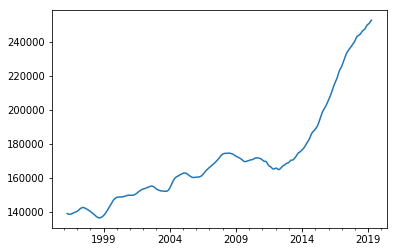

In [117]:
atx['78660'].plot()

In [119]:
atx.to_csv('SFR_processed.csv')

### I can turn this into a function now, and then place it in  ascript and use it to process all the zipcode csv files